## Assignment Instructions

> ### 1. Simulate a dataset of 100 rows with the following:

1. X1: Normally distributed, mean = 50, SD = 25
2. X2: Normally distributed, mean = 10, SD = 2
3. X3: Binary variable (0 or 1), with a 30% probability of being 1
   
(Tip: Use a Bernoulli distribution with p = 0.3 — the exact proportion in your dataset may vary slightly.) 

> ### 2. Generate the outcome variable y as:

Create y using the formula:

y = 1 * X1 + 5 * X2 + 10 * X3 + error

Where: error is a random value drawn from a normal distribution with a mean of 0 and a standard deviation of 2.

> ### 3. Fit a linear regression model:

Model: y ~ X1 + X2 + X3
Use the statsmodels library in Python.

>## Output the following:
1. Coefficients for each variable
2. R-squared value
3. P-values for each coefficient


In [8]:
# Import libraries
import pandas as pd
import numpy as np

# Visualizatiosn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Dataset Simulation

In [9]:
# Set a random seed for reproducability
np.random.seed(42)

# Dataset of 100 rows for X1, X2, X3
size = 100

# X1 - Normal distribution (mean=50, std=25)
X1 = np.random.normal(loc=50, scale=25, size=size)
print(f'Len of X1:{len(X1)}, mean:{np.mean(X1)}, std:{np.std(X1)}\n')

# X2 - Normal distribution (mean=10, std=2)
X2 = np.random.normal(loc=10, scale=2, size=size)
print(f'Len of X2:{len(X2)}, mean:{np.mean(X2)}, std:{np.std(X2)}\n')

# X3 - Bernoulli with 0.3P
X3 = np.random.binomial(n=1, p=0.3, size=size)
print(f'Len of X3:{len(X3)}, mean:{np.mean(X3)}, std:{np.std(X3)}')
print(f'Bernoulli Count: {np.unique(X3, return_counts=True)}')

Len of X1:100, mean:47.40383706514766, std:22.59040441611574

Len of X2:100, mean:10.044609174099847, std:1.8977772810212923

Len of X3:100, mean:0.26, std:0.4386342439892262
Bernoulli Count: (array([0, 1]), array([74, 26]))


In [10]:
# Create DataFrame for easier handling and viewing
df = pd.DataFrame({
    'X1': X1,
    'X2': X2,
    'X3': X3
})

# Check the shape of the df
print(df.shape)

# Print the first 5 rows
df.head()

(100, 3)


,X1,X2,X3
0,62.417854,7.169259,1
1,46.543392,9.158709,1
2,66.192213,9.314571,0
3,88.075746,8.395445,1
4,44.146166,9.677429,0


### Data Visualizations

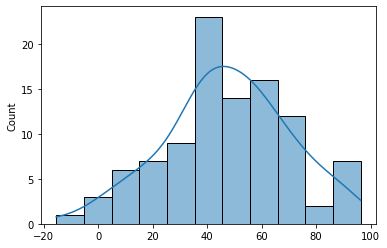

In [11]:
sns.histplot(X1, kde=True);

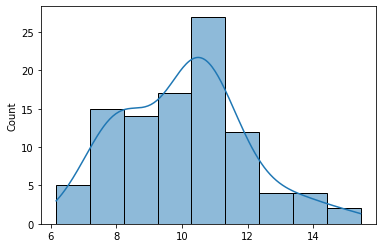

In [12]:
sns.histplot(X2, kde=True);

[0 1]
[74 26]


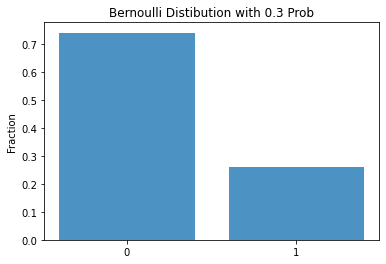

In [13]:
# Visualize X3 Bernoulli dist 
values, counts = np.unique(X3, return_counts=True)
print(values)
print(counts)

plt.bar(values, counts/100, align='center', alpha=0.8)
plt.xticks(values)
plt.ylabel('Fraction')
plt.title('Bernoulli Distibution with 0.3 Prob');

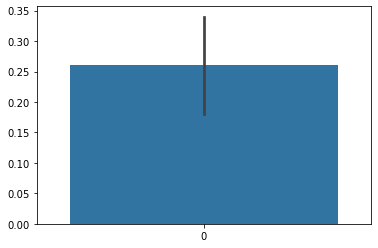

In [14]:
# Counting occurrences of 0s and 1s
sns.barplot(data=X3);

### Calculating Y variable = 1 * X1 + 5 * X2 + 10 * X3 + error

In [15]:
# Error: Random value from normal distribution (mean=0, std=2)
error = np.random.normal(0, 2, 100)

y = 1 * X1 + 5 * X2 + 10 *X3 + error

# Add Y to the dataframe
df['y'] = y

# Print the first 5 rows
df.head()

,X1,X2,X3,y
0,62.417854,7.169259,1,107.960576
1,46.543392,9.158709,1,103.513574
2,66.192213,9.314571,0,113.327052
3,88.075746,8.395445,1,138.807575
4,44.146166,9.677429,0,92.117064


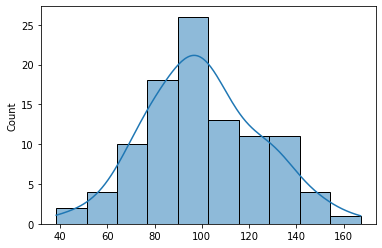

In [42]:
# Plot the distribution of Y
sns.histplot(y, kde=True);

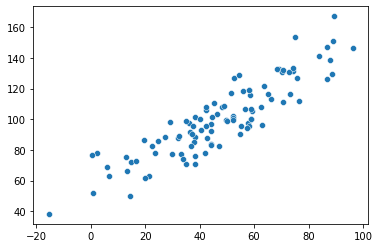

In [73]:
# Scatter plot to check for linearity
sns.scatterplot(x=X1, y=y);

In [17]:
# Statistical analysis of all adat points
df.describe()

,X1,X2,X3,y
count,100.000000,100.000000,100.000000,100.000000
mean,47.403837,10.044609,0.260000,100.396503
std,22.704211,1.907338,0.440844,24.285944
min,-15.493628,6.162458,0.000000,38.311973
25%,34.977358,8.388679,0.000000,83.810533
50%,46.826093,10.168214,0.000000,98.891581
75%,60.148801,11.076341,1.000000,116.521712
max,96.306955,15.440338,1.000000,167.163450


In [18]:
# Correlation of independent variables against the dependent variable Y
df.corr()['y']

X1    0.892714
X2    0.285268
X3    0.270266
y     1.000000
Name: y, dtype: float64

### Model prediction using statsmodel formula and no train test split

In [78]:
import statsmodels.formula.api as smf

# Fit the model using the formula
model = smf.ols('y ~ X1 + X2 + X3', data=df)
results = model.fit()

# View the results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     7479.
Date:                Thu, 10 Jul 2025   Prob (F-statistic):          1.28e-113
Time:                        11:19:45   Log-Likelihood:                -187.46
No. Observations:                 100   AIC:                             382.9
Df Residuals:                      96   BIC:                             393.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6478      0.981     -0.661      0.511      -2.595       1.299
X1             1.0000      0.007    138.557      0.000       0.986       1.014
X2             5.0917      0.086     59.253      0.000       4.921       5.262
X3             9.5954      0.369     25.986      0.000       8.862      10.328
==============================================================================
Omnibus:                        1.685   Durbin-Watson:                   1.804
Prob(Omnibus):                  0.431   Jarque-Bera (JB):                1.323
Skew:                           0.278   Prob(JB):                        0.516
Kurtosis:                       3.095   Cond. No.                         326.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
print(f'Params: {results.params}\n')
print(f'R-Squared: {results.rsquared}\n')
print(f'p-values: {results.pvalues}')

Params: Intercept   -0.647800
X1           1.000022
X2           5.091748
X3           9.595354
dtype: float64

R-Squared: 0.995739723128468

p-values: Intercept     5.105126e-01
X1           2.288470e-112
X2            2.099860e-77
X3            3.169691e-45
dtype: float64


### Train test split the data

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# Define X
X = df[['X1', 'X2', 'X3']]
X

,X1,X2,X3
0,62.417854,7.169259,1
1,46.543392,9.158709,1
2,66.192213,9.314571,0
3,88.075746,8.395445,1
4,44.146166,9.677429,0
...,...,...,...
95,13.412126,10.770635,0
96,57.403007,8.232285,0
97,56.526382,10.307450,0
98,50.127836,10.116417,0


In [25]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    shuffle = True,
                                                    random_state=42)

# Assert that X_train and y_train have the same shape
assert(X_train.shape[0] == y_train.shape[0])

print(f'X_train: {X_train.shape}, y_train: {y_train.shape}')


X_train: (70, 3), y_train: (70,)


### Linear Regresson Model fit

In [22]:
# Import modelling libraries
import statsmodels.api as sm

In [82]:
# Add a constant
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Model fit
model_1 = sm.OLS(y_train, X_train)
results_1 = model.fit()
results_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     7479.
Date:                Thu, 10 Jul 2025   Prob (F-statistic):          1.28e-113
Time:                        11:22:40   Log-Likelihood:                -187.46
No. Observations:                 100   AIC:                             382.9
Df Residuals:                      96   BIC:                             393.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6478      0.981     -0.661      0.511      -2.595       1.299
X1             1.0000      0.007    138.557      0.000       0.986       1.014
X2             5.0917      0.086     59.253      0.000       4.921       5.262
X3             9.5954      0.369     25.986      0.000       8.862      10.328
==============================================================================
Omnibus:                        1.685   Durbin-Watson:                   1.804
Prob(Omnibus):                  0.431   Jarque-Bera (JB):                1.323
Skew:                           0.278   Prob(JB):                        0.516
Kurtosis:                       3.095   Cond. No.                         326.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
print(f'Params: {results_1.params}\n')
print(f'R-Squared: {results_1.rsquared}\n')
print(f'p-values: {results_1.pvalues}')

Params: Intercept   -0.647800
X1           1.000022
X2           5.091748
X3           9.595354
dtype: float64

R-Squared: 0.995739723128468

p-values: Intercept     5.105126e-01
X1           2.288470e-112
X2            2.099860e-77
X3            3.169691e-45
dtype: float64


$$ \large R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = 1 - \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $$

R-squared: 1.000 ***100% of the variations in dependent variable $y$ are explained by the independent variables in our model.***

## Assumptions of Multiple Linear Regression

1. Linearity between the dependent and independent variables
2. Independence of errors
3. Homoscedasticity - variance of residuals is constant across all level of independent variables
4. No multicollinearity of independent variables
5. Normality of residuals


> **Model Quality Checks**
1. **Omnibus -** Tests normality of residuals. High p-value suggests residuals are normally distributed ✓
2. **Durbin-Watson -** Tests for autocorrelation. Values around 2 indicate no autocorrelation ✓
3. **Jarque-Bera: -** Another normality test. High p-value confirms normal residuals ✓

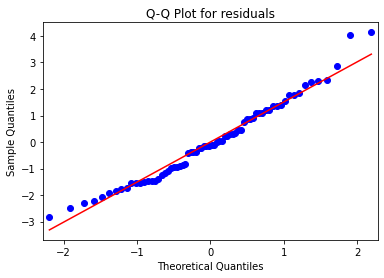

In [27]:
# Q-Q Plot for residuals
sm.qqplot(results.resid, line='s')
plt.title('Q-Q Plot for residuals')
plt.show()

In [36]:
# Check the predictd values
y_pred = results.predict(X_test)

In [37]:
y_pred.shape

(30,)

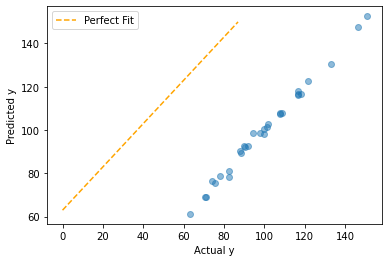

In [63]:
# Run this cell without changes

preds = results.predict(X_test)
fig, ax = plt.subplots()

perfect_line = np.arange(y_test.min(), y_test.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y_test, preds, alpha=0.5)
ax.set_xlabel("Actual y")
ax.set_ylabel("Predicted y")
ax.legend();